In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
summer = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/summer.csv")
winter = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/winter.csv")
track = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/data.csv")
countries = pd.read_csv("https://raw.githubusercontent.com/rajeevratan84/data-analyst-bootcamp/master/dictionary.csv")

# Summer

In [3]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [55]:
summer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        31165 non-null  int64 
 1   city        31165 non-null  object
 2   sport       31165 non-null  object
 3   discipline  31165 non-null  object
 4   athlete     31165 non-null  object
 5   country     31161 non-null  object
 6   gender      31165 non-null  object
 7   event       31165 non-null  object
 8   medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [5]:
summer.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

In [6]:
new_cols = {
    'Year':'year', 
    'City' :'city',
    'Sport':'sport', 
    'Discipline':'discipline', 
    'Athlete' :'athlete',
    'Country' :'country',
    'Gender': 'gender',
    'Event' : 'event',
    'Medal': 'medal'
}

In [9]:
summer.rename(columns=new_cols, inplace=True)
summer.columns

Index(['year', 'city', 'sport', 'discipline', 'athlete', 'country', 'gender',
       'event', 'medal'],
      dtype='object')

In [68]:
summer['athlete']=summer['athlete'].str.split(', ').str[::-1].str.join(' ')
summer['athlete']=summer['athlete'].str.title()

In [69]:
distinct_disciplines = summer['discipline'].unique()
print(len(distinct_disciplines))

67


In [70]:
medals_discipline = summer.groupby(["discipline"])["medal"].count()
medals_discipline.value_counts(normalize = True)

6       0.059701
24      0.044776
66      0.044776
30      0.029851
3       0.029851
144     0.029851
27      0.029851
153     0.014925
48      0.014925
174     0.014925
296     0.014925
934     0.014925
549     0.014925
33      0.014925
59      0.014925
14      0.014925
180     0.014925
21      0.014925
15      0.014925
1422    0.014925
12      0.014925
267     0.014925
10      0.014925
8       0.014925
5       0.014925
4       0.014925
912     0.014925
591     0.014925
3638    0.014925
894     0.014925
1109    0.014925
1150    0.014925
392     0.014925
1012    0.014925
112     0.014925
748     0.014925
491     0.014925
880     0.014925
973     0.014925
93      0.014925
90      0.014925
1497    0.014925
94      0.014925
2103    0.014925
593     0.014925
335     0.014925
78      0.014925
1613    0.014925
331     0.014925
329     0.014925
72      0.014925
327     0.014925
2628    0.014925
192     0.014925
315     0.014925
2667    0.014925
Name: medal, dtype: float64

In [71]:
bmx = summer.loc[summer['discipline'] == "BMX"]
bmx.head()

,year,city,sport,discipline,athlete,country,gender,event,medal
28018,2008,Beijing,Cycling,BMX,Donny Robinson,USA,Men,Individual,Bronze
28019,2008,Beijing,Cycling,BMX,Maris Strombergs,LAT,Men,Individual,Gold
28020,2008,Beijing,Cycling,BMX,Mike Day,USA,Men,Individual,Silver
28021,2008,Beijing,Cycling,BMX,Jill Kintner,USA,Women,Individual,Bronze
28022,2008,Beijing,Cycling,BMX,Anne-Caroline Chausson,FRA,Women,Individual,Gold


Fun fact: BMX Racing was added to the Olympic Games in 2008. Now, BMX Freestyle has been recently added for the 2020 Olympic Games in Tokyo

In [72]:
medals=summer.groupby(['athlete','medal'])['sport'].count().reset_index().sort_values(by='sport',ascending=False)
medals=medals.drop_duplicates(subset=['medal'],keep='first')
medals.rename(columns = {'sport' : 'count'})
medals.head()

,athlete,medal,sport
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


The most "medaled" athlete  in summer olympics was Micheal Phelps, swimmer.

In [77]:
michael_phelps = summer.loc[summer['athlete'] == 'Michael Phelps']
michael_phelps.head()

,year,city,sport,discipline,athlete,country,gender,event,medal
25225,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,100M Butterfly,Gold
25253,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Butterfly,Gold
25258,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Freestyle,Bronze
25265,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,200M Individual Medley,Gold
25277,2004,Athens,Aquatics,Swimming,Michael Phelps,USA,Men,400M Individual Medley,Gold


In [81]:
michael_phelps.groupby(['event'])['medal'].count().reset_index()

,event,medal
0,100M Butterfly,3
1,200M Butterfly,3
2,200M Freestyle,2
3,200M Individual Medley,2
4,200M Medley,1
5,400M Individual Medley,2
6,4X100M Freestyle,1
7,4X100M Freestyle Relay,2
8,4X100M Medley,1
9,4X100M Medley Relay,2


<AxesSubplot:ylabel='event'>

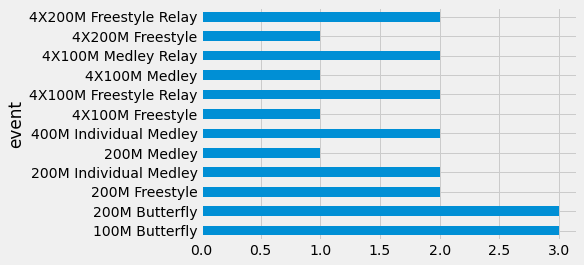

In [84]:
michael_phelps.groupby(['event'])['medal'].count().plot(kind='barh')